#**Baseball Batting Statistics, 1871-2012**
**Author:** Anne Marie Bogar<br/>
**Active Project Dates:** June 17-30, 2024<br/>
<br/>
##Summary
The goal of this project is to qery a list of baseball players and their batting stats from a database and manipulate, analyze and visualize the data in Python using pandas, matplotlib and seaborn. The data is cleaned and calculated columns are added, and then the DataFrames are reshapedd, regrouped and filtered to extract meaning from the data. Interesting insights are then visualized in easy-to-consume graphs using seaborn and matplotlib.
<br/><br/>
#Data
The [data](https://www.kaggle.com/datasets/freshrenzo/lahmanbaseballdatabase) is from a collection of CSV files about baseball players between the years 1871 and 2012. The specific csv files used are the Master file and the Batting file.<br/><br/>

Master
- playerID - unique code assigned to each player
- birthYear - year of birth
- birthMonth - month of birth
- birthDay - day of birth
- nameFirst - first name
- nameLast - last name
- weight - player's weight in pounds
- height - player's height in inches
- bats - player's batting hand (left, right, both)
- throws - player's throwing hand (left, right)

Batting
- yearID - year
- stint - order of appearances in the season
- teamID - team
- lgID - league
- G - number of games played
- G_batting - number of games as a batter
- AB - at bats
- R - runs
- H - hits
- 2B - doubles
- 3B - triples
- HR - homeruns
- RBI - runs batted in
- SB - stolen bases
- CS - caught stealing
- BB - base on balls (walks)
- SO - strikeouts
- IBB - intentional walks
- HBP - hit by pitch
- SH - sacrifice hits
- SF - sacrifice flies
- GIDP - grounded into double play
- G_old - old version of games (depreciated)

###SQL to retrieve player and batting info of active players having played at least 50 games
*Note: for convenience, the SQL query has already been saved in a csv*<br/><br/>
SELECT m."nameLast" || ' ' || m."nameFirst" AS name, m."weight", m."height",<br/>
m."bats", m."throws", m."birthYear", m."birthMonth", m."birthDay", b.*<br/>
FROM "Master" AS m<br/>
JOIN public."Batting" as b on m."playerID" = b."playerID"<br/>
WHERE m."playerID" IN<br/>
(SELECT m."playerID"<br/>
FROM public."Master" m<br/>
JOIN public."Batting" b on m."playerID" = b."playerID"<br/>
WHERE m."finalGame" IS NULL AND m."birthYear" > 1900<br/>
GROUP BY m."playerID"<br/>
HAVING SUM(b."G") >= 50)<br/>
ORDER BY b."playerID"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [2]:
#This CSV file was created using PostgreSQL in Python using the query above
#The queried table was saved to a CSV file for convenience in Google Colab
df = pd.read_csv('baseball.csv', encoding='cp1252')

In [3]:
#Make DataFrame easier to visualize in Jupyter Notebooks

pd.options.display.max_columns = None
df.head()

,name,weight,height,bats,throws,birthYear,birthMonth,birthDay,battingID,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,David Aardsma,205,75,R,R,1981,12,27,1,aardsda01,2004,1,SFN,NL,11,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
1,David Aardsma,205,75,R,R,1981,12,27,2,aardsda01,2006,1,CHN,NL,45,43.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0
2,David Aardsma,205,75,R,R,1981,12,27,3,aardsda01,2007,1,CHA,AL,25,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,David Aardsma,205,75,R,R,1981,12,27,4,aardsda01,2008,1,BOS,AL,47,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
4,David Aardsma,205,75,R,R,1981,12,27,5,aardsda01,2009,1,SEA,AL,73,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
#Create datetime object using players' birth year,month,day
#Determine age by subtracting birthdate from today, divide number of days by 365

df = df.dropna(subset=["birthDay"])
birthdate = pd.to_datetime(df.loc[:,'birthYear':'birthDay'].rename(columns={"birthYear": "year", "birthMonth": "month", "birthDay":"day"}))
df.insert(6, "age", [int(math.floor((datetime.today()-x).days/365)) for x in birthdate])
df.drop(columns=['battingID', 'birthYear', 'birthMonth', 'birthDay'], inplace=True)

###Batting Stats Explained:
G=num games, G_batting=num games as batter, AB=at bats, R=runs, H=hits, 2B=doubles, 3B=triples,
HR=homeruns, RBI=rbi, SB=stolen bases, CS=caught stealing, BB=base on balls, SO=strikeouts,
IBB=intentional walks', HBP=hit by pitch, SH=sacrifice hits, SF=sacrifice flies, GIDP=ground into double play', G_old=old version

In [5]:
#Create DataFrame of each player with the batting stats summed up

bat_sum_df = df.drop(columns=['name', 'weight', 'height', 'bats', 'throws', 'age', 'yearID', 'stint', 'teamID', 'lgID'])
bat_sum_df = bat_sum_df.groupby(['playerID'], dropna=False).sum(min_count=1).reset_index()
bat_sum_df.head(20)
master_df = df.drop(columns=['yearID', 'teamID', 'lgID', 'stint', 'G',	'G_batting',	'AB',	'R',	'H',	'2B',	'3B',	'HR',	'RBI',	'SB',	'CS',	'BB',	'SO',	'IBB',	'HBP',	'SH',	'SF',	'GIDP',	'G_old'])
master_df = master_df.groupby(['playerID']).first()
players = pd.merge(master_df, bat_sum_df, on='playerID', how='inner')
players.head(10)

,playerID,name,weight,height,bats,throws,age,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,David Aardsma,205,75,R,R,42,255,68.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,63.0
1,abadfe01,Fernando Abad,205,74,L,L,38,87,50.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,28.0
2,abreubo01,Bobby Abreu,210,72,L,R,50,2347,2247.0,8347.0,1441.0,2437.0,565.0,59.0,287.0,1349.0,399.0,128.0,1456.0,1819.0,115.0,33.0,7.0,83.0,162.0,1941.0
3,abreuto01,Tony Abreu,200,69,B,R,39,168,146.0,437.0,40.0,110.0,27.0,3.0,4.0,46.0,2.0,2.0,16.0,83.0,1.0,4.0,0.0,7.0,14.0,59.0
4,accarje01,Jeremy Accardo,190,73,R,R,42,227,71.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,113.0
5,aceveal01,Alfredo Aceves,220,75,R,R,41,130,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0
6,ackledu01,Dustin Ackley,185,73,L,R,36,243,90.0,940.0,123.0,228.0,38.0,9.0,18.0,86.0,19.0,3.0,99.0,203.0,8.0,0.0,1.0,4.0,6.0,90.0
7,acostma01,Manny Acosta,170,76,R,R,43,230,180.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,105.0
8,adamsmi03,Mike Adams,195,77,R,R,46,329,255.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0
9,adamsru01,Russ Adams,200,72,L,R,43,286,286.0,884.0,125.0,218.0,46.0,7.0,17.0,113.0,15.0,5.0,85.0,118.0,2.0,5.0,8.0,11.0,14.0,278.0


In [6]:
#Drop all rows of original DataFrame with any Null value

df = df.dropna()

###Which active player had the most runs batted in (“RBI” from the Batting table) from 2005-2008?

In [7]:
maxRBIs = df[df['yearID'].isin([2005, 2006, 2007, 2008])].groupby(['playerID'])['RBI'].sum().reset_index(name='total RBIs').max()
print("Which active player had the most runs batted in from 2005-2008?")
print("Player:", str(df[df['playerID'] == maxRBIs['playerID']]['name'].iloc[0]), "\nTotal RBIs:", int(maxRBIs['total RBIs']))

Which active player had the most runs batted in from 2005-2008?
Player: Joel Zumaya 
Total RBIs: 510


###How many double plays did Albert Pujols ground into (“GIDP” from Batting table) in 2006?

In [8]:
print('How many double plays did Albert Pujols ground into in 2006?')
print(int(df[(df['name'] == 'Albert Pujols') & (df['yearID'] == 2006)]['GIDP'].iloc[0]))

How many double plays did Albert Pujols ground into in 2006?
20


###A histogram of triples (3B) per year

[Text(0, 0, '12'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '4')]

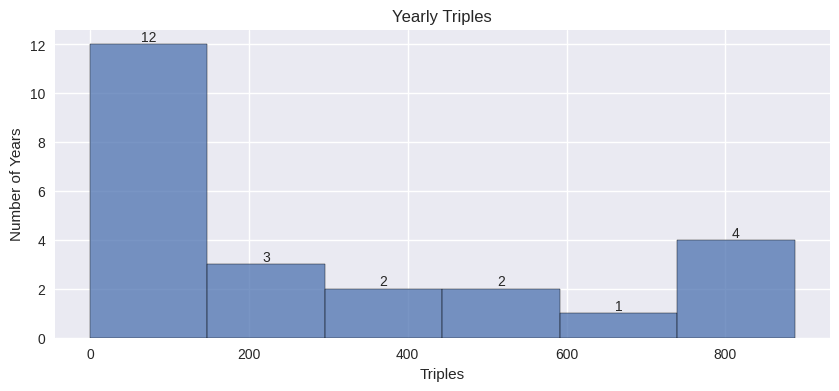

In [9]:
triples_by_year = df.groupby(['yearID'])['3B'].sum().reset_index(name='total triples')
#print(triples_by_year)
plt.figure(figsize=(10,4))
ax = plt.subplot(111)
ax.set_title("Yearly Triples")
ax.set_xlabel("Triples")
ax.set_ylabel('Number of Years')
ax = sns.histplot(x='total triples', data=triples_by_year)
ax.bar_label(ax.containers[0])

###A scatter plot relating triples (3B) and steals (SB)

Text(0, 0.5, 'Steals')

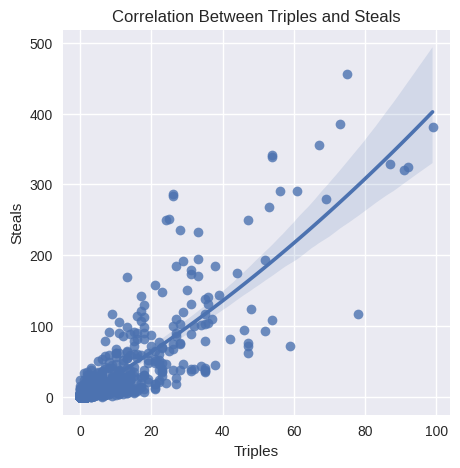

In [10]:
#A scatter plot relating triples (3B) and steals (SB)
triples_steals = df.groupby(['playerID']).agg(
     sum_3B = ('3B','sum'),
     sum_SB = ('SB','sum'),
     ).reset_index()
plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax = sns.regplot(x='sum_3B', y='sum_SB', data=triples_steals, ax=ax, order=2)
ax.set_title('Correlation Between Triples and Steals')
ax.set_xlabel('Triples')
ax.set_ylabel('Steals')

###Scatterplot Subplots comparing On Base Percentage to Walks, Runs, At Bats, and Sacrifice Hits (sacrifice bunts) to determine which stat has the highest correlation
On Base Percentage = (hits + walks + hit by pitch) / (at bats + walks + hit by pitch + sacrifice flies)

In [11]:
#Create new calculated column for On Base Percentage

players['OBP'] = (players['H'] + players['BB'] + players['IBB'] + players['HBP']) / (players['BB'] + players['IBB'] + players['HBP'] + players['SF'] + players['AB'])

Text(0, 0.5, '')

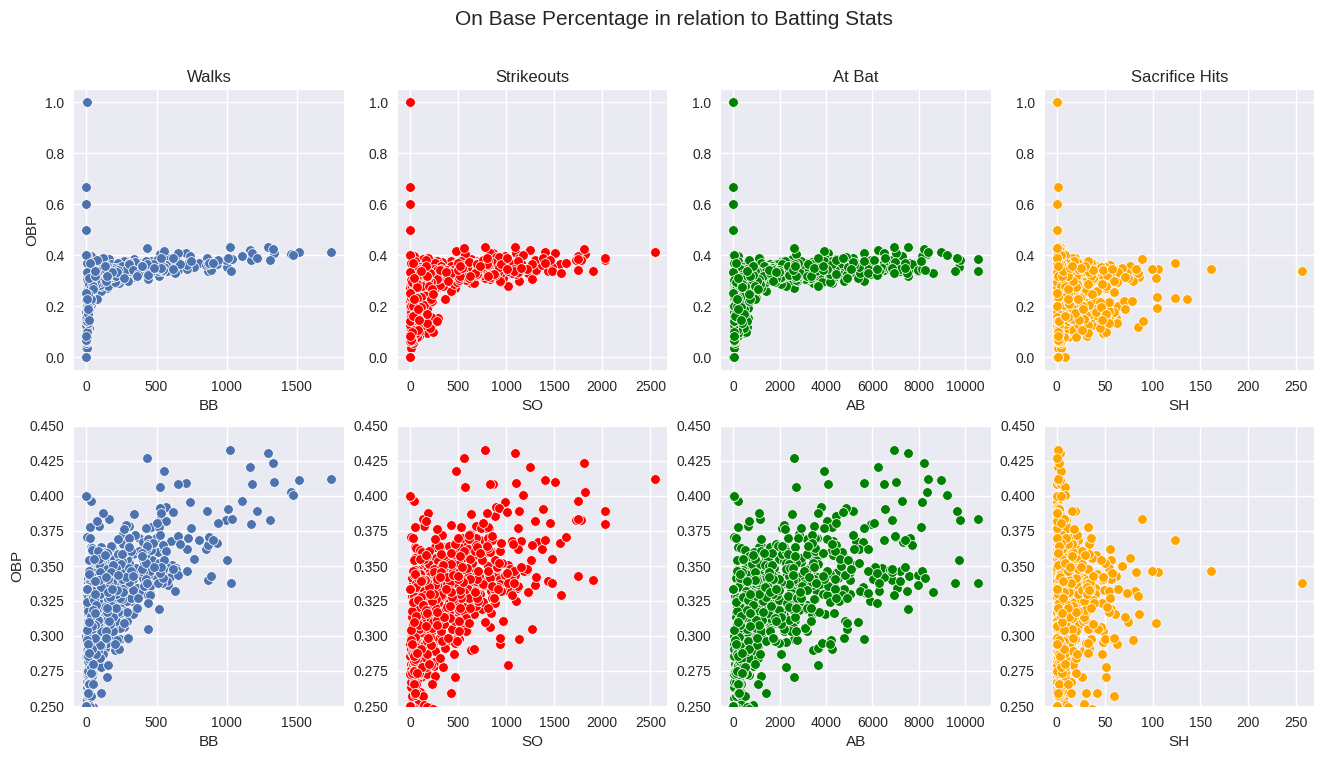

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
fig.suptitle('On Base Percentage in relation to Batting Stats', fontsize=15)
sns.scatterplot(x='BB', y='OBP', data=players, ax=axes[0,0])
axes[0,0].set_title('Walks')
sns.scatterplot(x='BB', y='OBP', data=players, ax=axes[1,0])
axes[1,0].set_ylim(0.25,0.45)
sns.scatterplot(x='SO', y='OBP', data=players, ax=axes[0,1], color='red')
axes[0,1].set_title('Strikeouts')
axes[0,1].set_ylabel('')
sns.scatterplot(x='SO', y='OBP', data=players, ax=axes[1,1], color='red')
axes[1,1].set_ylim(0.25,0.45)
axes[1,1].set_ylabel('')
sns.scatterplot(x='AB', y='OBP', data=players, ax=axes[0,2], color='green')
axes[0,2].set_title('At Bat')
axes[0,2].set_ylabel('')
sns.scatterplot(x='AB', y='OBP', data=players, ax=axes[1,2], color='green')
axes[1,2].set_ylim(0.25,0.45)
axes[1,2].set_ylabel('')
sns.scatterplot(x='SH', y='OBP', data=players, ax=axes[0,3], color='orange')
axes[0,3].set_title('Sacrifice Hits')
axes[0,3].set_ylabel('')
sns.scatterplot(x='SH', y='OBP', data=players, ax=axes[1,3], color='orange')
axes[1,3].set_ylim(0.25,0.45)
axes[1,3].set_ylabel('')

###Scatterplot Subplots comparing Intentional Walks to Homeruns, Hits and Runs to see which has the highest correlation

Text(0, 0.5, '')

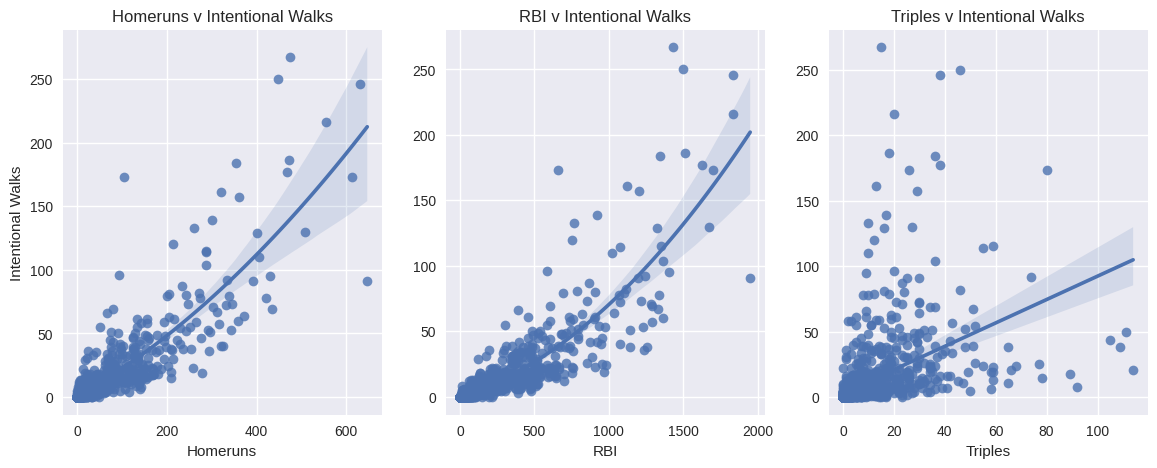

In [13]:
plt.figure(figsize=(14,5))
ax = plt.subplot(131)
ax = sns.regplot(x='HR', y='IBB', data=players, ax=ax, order=2)
ax.set_title('Homeruns v Intentional Walks')
ax.set_xlabel('Homeruns')
ax.set_ylabel('Intentional Walks')
ax = plt.subplot(132)
ax = sns.regplot(x='RBI', y='IBB', data=players, ax=ax, order=2)
ax.set_title('RBI v Intentional Walks')
ax.set_xlabel('RBI')
ax.set_ylabel('')
ax = plt.subplot(133)
ax = sns.regplot(x='3B', y='IBB', data=players, ax=ax)
ax.set_title('Triples v Intentional Walks')
ax.set_xlabel('Triples')
ax.set_ylabel('')

###Subplots, with the first being a pie chart showing the percentage of batters that bat right/left/both, and the rest showing the number of Homeruns, Walks, Hits, RBI, Triples, Doubles, Stolen Bases, and Intentional Walks per batter for each batting preference

In [14]:
#Create new DataFrame grouping by bat preference (left, right, both (ambidexterous))

bats_stats = players.groupby(['bats']).agg(
    avg_OBP = ('OBP', 'mean'),
    total_HR = ('HR', 'sum'),
    total_walks = ('BB', 'sum'),
    total_hits = ('H', 'sum'),
    total_triples = ('3B', 'sum'),
    total_doubles = ('2B', 'sum'),
    total_rbi = ('RBI', 'sum'),
    total_strikeouts = ('SO', 'sum'),
    total_stolen = ('SB', 'sum'),
    total_intentionals = ('IBB', 'sum'),
    total_batters = ('bats', 'count')
    ).reset_index()
bats_stats['batter_percent'] = bats_stats['total_batters']/bats_stats['total_batters'].sum() * 100
#bats_stats['HR'] = list(players.groupby(['bats'])['HR'].sum())
#bats_stats['HR_percent'] = bats_stats['total_HR'] / bats_stats['total_HR'].sum() * 100
bats_stats['HR_per_batter'] = round(bats_stats['total_HR'] / bats_stats['total_batters'], 1)
#bats_stats['batters'] = list(players.groupby(['bats'])['bats'].count())
#bats_stats['walk_percent'] = bats_stats['total_walks'] / bats_stats['total_walks'].sum() * 100
bats_stats['walk_per_batter'] = round(bats_stats['total_walks'] / bats_stats['total_batters'], 1)
#bats_stats['hit_percent'] = bats_stats['total_hits'] / bats_stats['total_hits'].sum() * 100
bats_stats['hit_per_batter'] = round(bats_stats['total_hits'] / bats_stats['total_batters'], 1)
bats_stats['triples_per_batter'] = round(bats_stats['total_triples'] / bats_stats['total_batters'], 1)
bats_stats['doubles_per_batter'] = round(bats_stats['total_doubles'] / bats_stats['total_batters'], 1)
bats_stats['rbi_per_batter'] = round(bats_stats['total_rbi'] / bats_stats['total_batters'], 1)
bats_stats['strikeouts_per_batter'] = round(bats_stats['total_strikeouts'] / bats_stats['total_batters'], 1)
bats_stats['stolen_per_batter'] = round(bats_stats['total_stolen'] / bats_stats['total_batters'], 1)
bats_stats['intentionals_per_batter'] = round(bats_stats['total_intentionals'] / bats_stats['total_batters'], 1)
bats_stats

,bats,avg_OBP,total_HR,total_walks,total_hits,total_triples,total_doubles,total_rbi,total_strikeouts,total_stolen,total_intentionals,total_batters,batter_percent,HR_per_batter,walk_per_batter,hit_per_batter,triples_per_batter,doubles_per_batter,rbi_per_batter,strikeouts_per_batter,stolen_per_batter,intentionals_per_batter
0,B,0.318342,6071.0,25366.0,65219.0,1899.0,12695.0,29073.0,42841.0,6501.0,1761.0,125,9.090909,48.6,202.9,521.8,15.2,101.6,232.6,342.7,52.0,14.1
1,L,0.263333,17175.0,55923.0,137416.0,3429.0,27810.0,69257.0,104066.0,9812.0,5485.0,425,30.909091,40.4,131.6,323.3,8.1,65.4,163.0,244.9,23.1,12.9
2,R,0.232140,28056.0,76510.0,233615.0,4164.0,47136.0,116373.0,171602.0,14616.0,5612.0,825,60.000000,34.0,92.7,283.2,5.0,57.1,141.1,208.0,17.7,6.8


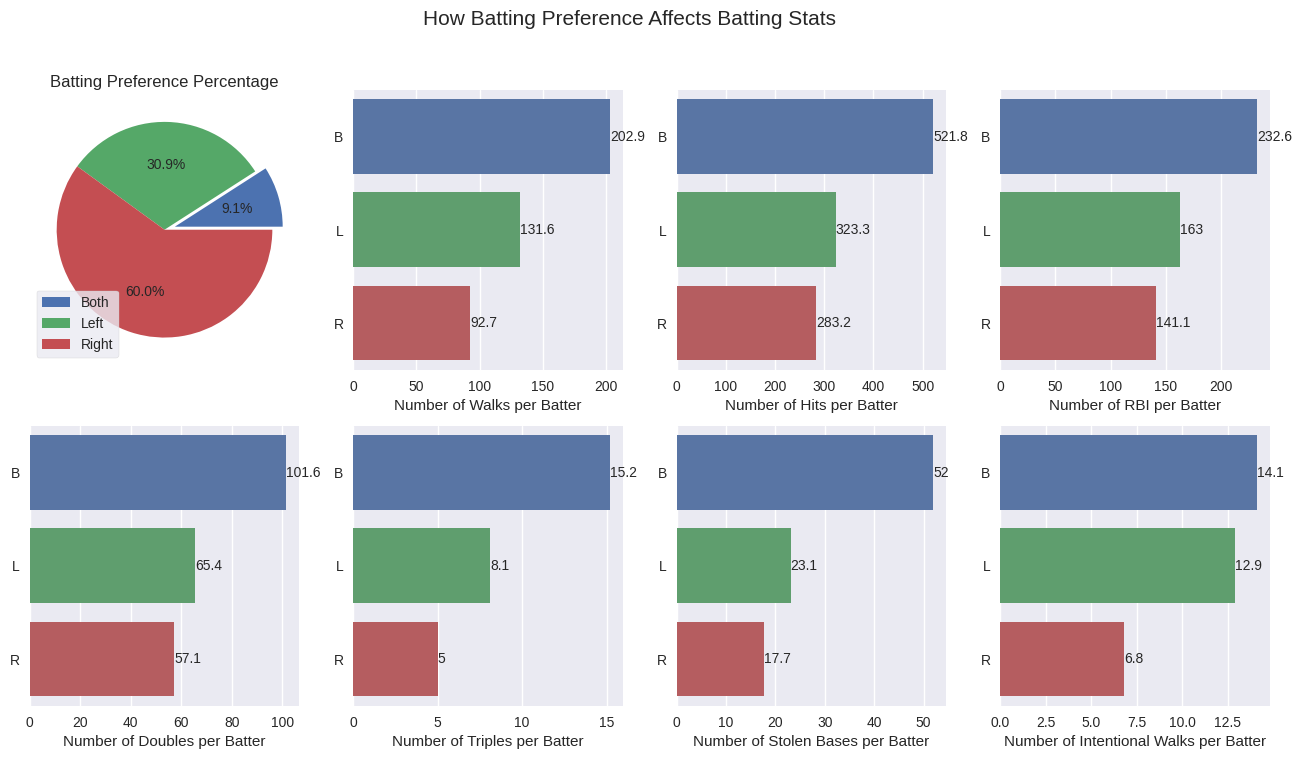

In [15]:
#Subplots

def customize_subplot(ax, column, x_label):
  sns.barplot(ax=ax, data=bats_stats, y=bats_stats['bats'], x=bats_stats[column], hue=bats_stats['bats'])
  #ax.grid(False)
  for container in ax.containers:
    ax.bar_label(container)
  ax.set(xlabel=x_label, ylabel='')

fig, axes = plt.subplots(2, 4, figsize=(16,8))
fig.suptitle('How Batting Preference Affects Batting Stats', fontsize=15)
explode = (.1,0,0)
wedges, labels, texts = axes[0,0].pie(bats_stats['batter_percent'], autopct='%1.1f%%', explode=explode)
axes[0,0].legend(wedges, ['Both', 'Left', 'Right'], frameon=True)
axes[0,0].set_title('Batting Preference Percentage')
customize_subplot(axes[0,1], 'walk_per_batter', 'Number of Walks per Batter')
customize_subplot(axes[0,2], 'hit_per_batter', 'Number of Hits per Batter')
customize_subplot(axes[0,3], 'rbi_per_batter', 'Number of RBI per Batter')
customize_subplot(axes[1,0], 'doubles_per_batter', 'Number of Doubles per Batter')
customize_subplot(axes[1,1], 'triples_per_batter', 'Number of Triples per Batter')
customize_subplot(axes[1,2], 'stolen_per_batter', 'Number of Stolen Bases per Batter')
customize_subplot(axes[1,3], 'intentionals_per_batter', 'Number of Intentional Walks per Batter')

###Histogram displaying at what age and number of years into playing at a professional level each player reached their peak performance
Peak performance is determined by the year with the biggest number of higest stats

In [16]:
#Create new DataFrame grouping playerID to determine which year was each player's peak performance

player_progression = df.groupby(['playerID'])
top_performance = pd.DataFrame(columns=['playerID','name','age','year','num_years'])

for player, stats in player_progression:
  stats = stats.reset_index()
  top_year = stats.drop(columns=['weight', 'height', 'age', 'playerID', 'yearID', 'stint', 'G', 'G_old', 'name', 'bats', 'throws', 'teamID', 'lgID', 'CS', 'SO', 'GIDP', 'HBP']).idxmax().mode()[0]
  name = stats.iloc[top_year:top_year+1]['name'].iloc[0]
  year = stats.iloc[top_year:top_year+1]['yearID'].iloc[0]
  num_years = top_year+1
  age = stats.iloc[:1]['age'].iloc[0] - (datetime.today().year - year)
  top_performance = pd.concat([top_performance, pd.DataFrame.from_dict([{'playerID':player[0], 'name':name, 'age':age, 'year':year, 'num_years':num_years}])])

[Text(0, 0, '894'),
 Text(0, 0, '209'),
 Text(0, 0, '107'),
 Text(0, 0, '38'),
 Text(0, 0, '27'),
 Text(0, 0, '27'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

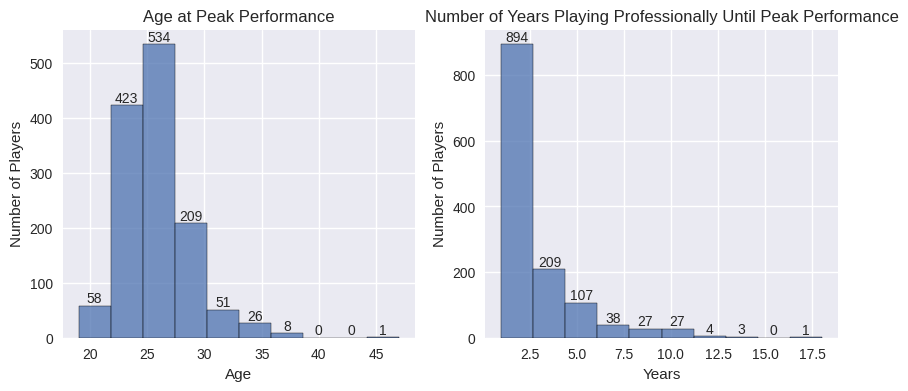

In [17]:
#Histograms

plt.figure(figsize=(10,4))
ax1 = plt.subplot(121)
ax1.set_title("Age at Peak Performance")
ax1.set_xlabel("Age")
ax1.set_ylabel('Number of Players')
ax1 = sns.histplot(x='age', data=top_performance, bins=10)
ax1.bar_label(ax1.containers[0])

ax2 = plt.subplot(122)
ax2.set_title("Number of Years Playing Professionally Until Peak Performance")
ax2.set_xlabel("Years")
ax2.set_ylabel('Number of Players')
ax2 = sns.histplot(x='num_years', data=top_performance, bins=10)
ax2.bar_label(ax2.containers[0])

###Subplot of line graphs showing the progression of one player's batting stats, highlighting the age at which they peaked
Stats: runs, hits, doubles, triples, homeruns, rbi, walks, stolen bases

In [23]:
#Filter DataFrame to only the players who have played more than one year to see progression

print("Choose a player to analyze:\n")
for player, group in df.groupby(['playerID']).filter(lambda x: len(x) > 1).groupby(['playerID']):
  print('Name:', group['name'].iloc[0])
  print('Player ID:', group['playerID'].iloc[0])

Choose a player to analyze:

Name: David Aardsma
Player ID: aardsda01
Name: Bobby Abreu
Player ID: abreubo01
Name: Jeremy Accardo
Player ID: accarje01
Name: Manny Acosta
Player ID: acostma01
Name: Mike Adams
Player ID: adamsmi03
Name: Russ Adams
Player ID: adamsru01
Name: Jeremy Affeldt
Player ID: affelje01
Name: Matt Albers
Player ID: alberma01
Name: Eliezer Alfonzo
Player ID: alfonel01
Name: Brandon Allen
Player ID: allenbr01
Name: Alfredo Amezaga
Player ID: amezaal01
Name: Brian N. Anderson
Player ID: anderbr03
Name: Garret Anderson
Player ID: anderga01
Name: Josh Anderson
Player ID: anderjo03
Name: Marlon Anderson
Player ID: anderma02
Name: Robert Andino
Player ID: andinro01
Name: Rick Ankiel
Player ID: ankieri01
Name: Greg Aquino
Player ID: aquingr01
Name: Alberto Arias
Player ID: ariasal02
Name: Joaquin Arias
Player ID: ariasjo01
Name: Jose Arredondo
Player ID: arredjo01
Name: Bronson Arroyo
Player ID: arroybr01
Name: Garrett Atkins
Player ID: atkinga01
Name: Rich Aurilia
Player 

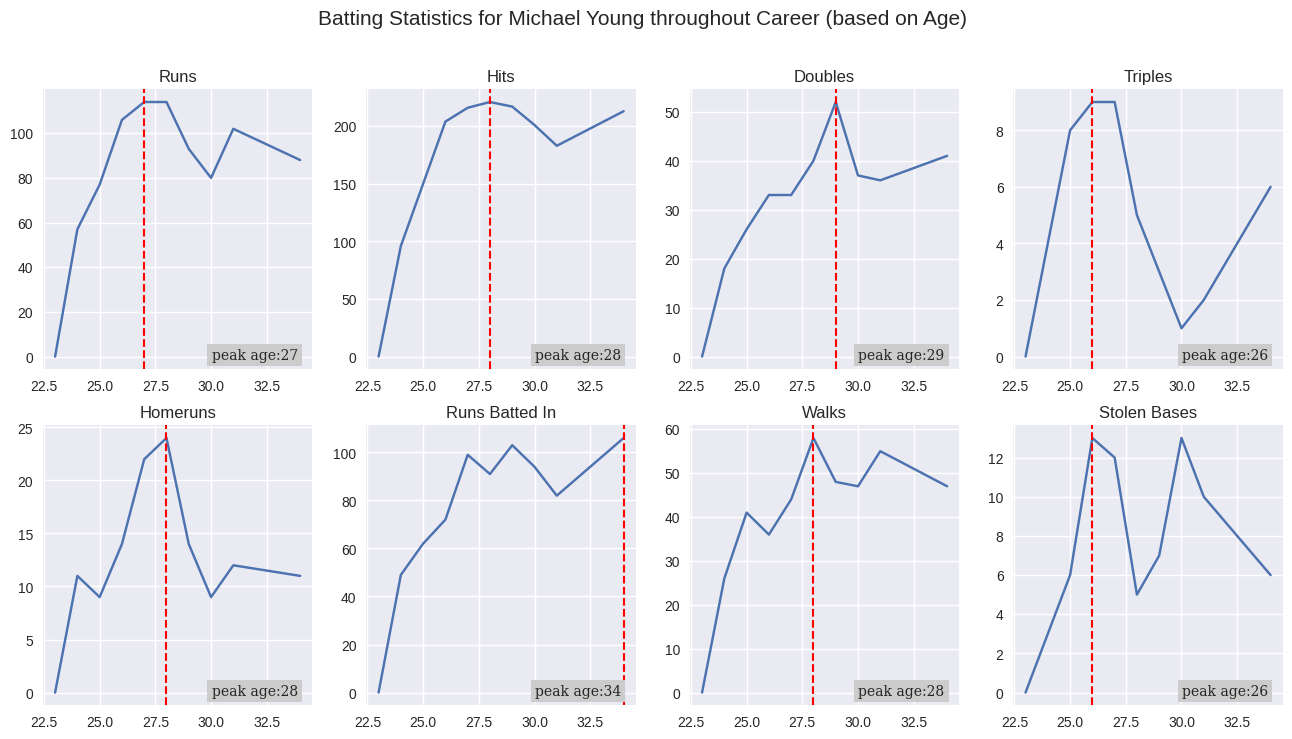

In [22]:
#Subplots

player = 'youngmi02'

def customize_lineplot(ax, column, title, data):
  peak = data[column].idxmax()
  age = data.iloc[peak:peak+1]['age_at_year'].iloc[0]
  sns.lineplot(ax=ax, data=data, x="age_at_year", y=column)
  #line = ax.get_lines()[0]
  #props = {'marker':'o','markersize':15, 'fillstyle':'none','markeredgewidth':1.5,
  #       'markeredgecolor':'black','markevery': [peak]}
  #line.set(**props)
  ax.axvline(age,linestyle='--', linewidth=1.5, color='r')
  ax.annotate("peak age:"+str(age), xy=(0.6, 0.1), xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize='medium', verticalalignment='top', fontfamily='serif',
        bbox=dict(facecolor='0.8', edgecolor='none', pad=3.0))
  ax.set(xlabel='', ylabel='')
  ax.set_title(title)

pname = player_progression.get_group(player)['name'].iloc[0]
prog = player_progression.get_group(player).reset_index()
prog['age_at_year'] = prog['age'] - (datetime.today().year - prog['yearID'])
fig, axes = plt.subplots(2, 4, figsize=(16,8))
fig.suptitle(f'Batting Statistics for {pname} throughout Career (based on Age)', fontsize=15)
customize_lineplot(axes[0,0], 'R', 'Runs', prog)
customize_lineplot(axes[0,1], 'H', 'Hits', prog)
customize_lineplot(axes[0,2], '2B', 'Doubles', prog)
customize_lineplot(axes[0,3], '3B', 'Triples', prog)
customize_lineplot(axes[1,0], 'HR', 'Homeruns', prog)
customize_lineplot(axes[1,1], 'RBI', 'Runs Batted In', prog)
customize_lineplot(axes[1,2], 'BB', 'Walks', prog)
customize_lineplot(axes[1,3], 'SB', 'Stolen Bases', prog)